<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

# chaper.5 트리 알고리즘

## 05-1 결정 트리

### - 로지스틱 회귀로 와인 분류하기

와인 데이터를 먼저 불러오자. 
데이터 출처 : https://github.com/rickiepark/hg-mldl

In [1]:
import pandas as pd
wine = pd.read_csv('/home/jaeyoon89/hg-mldl/wine.csv')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


데이터를 잘 불러왔다 처음의 열 3개는 각각 알코올 도수,당도,PH 값을 나타낸다. 네번째 열은 타깃값으로 0이면 레드와인 1이면 화이트 와인이다. 레드 와인과 화이트 와인을 구분하는 이진 분류 문제이고, 화이트 와인이 양성 클래스이다. 즉 전체 와인에서 화이트 와인을 골라내는 문제이다. 로지스틱 회귀 모델을 바로 훈련하기 전에 판다스 데이터프레임의 유용한 메서드 2개를 먼저 알아보자.

먼저 info() 메서드이다. 이 메서드는 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는데 유용하다.


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


출력 결과를 보면 총 6497개의 샘플이 있고 누락된 값은 없는 것 같다.

다음 알아볼 메서드는 describe() 메서드이다. 이 메서드는 열에 대한 간략한 통계를 출력한다.

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


평균, 표준편차, 최소, 최대값과 중간값, 1사분위수, 3사분위수를 알려준다.

여기서 알 수 있는 것은 알코올 도수와 당도, PH 값의 스케일이 다르다는 것이다. 이전에 배웠던 사이킷런의 StandardScaler 클래스를 사용해 특성을 표준화하자. 그전에 먼저 데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나누자.

In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

그 다음으로 훈련 세트와 테스트 세트로 나누자.

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정한다. 샘플개수가 충분히 많으므로 20% 정도만 테스트 세트로 나누었다. 코드의 test_size=0.2가 이런 의미이다.

In [8]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


이제 StandardScaler 클래스를 사용해 훈련 세트를 전처리 해보자.

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

이제 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련하자.

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


점수가 높지 않다. 훈련 세트와 테스트 세트의 점수가 모두 낮아서 모델이 과소적합이라 볼 수 있다.이 문제를 해결하기 위해 규제 매개 변수 C의 값을 바꾸던지 solver 매개변수에서 다른 알고리즘을 선택할 수도 있다. 또한 다항 특성을 만들어 추가할 수도 있다.

### - 설명하기 쉬운 모델과 어려운 모델

로지스틱 회귀가 학습한 계수와 절편을 출력해 보자.

In [11]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


사실 이 모델이 왜 저런 계수 값을 학습했는지 정확히 이해하기 어렵다. 아마도 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, PH가 높을수록 레드 와인일 가능성이 높은 것 같다. 하지만 정확히 이 숫자가 어떤 의미인지 설명하긴 어렵다. 더군다나 다항 특성을 추가한다면 설명하기가 더 어려울 것이다. 대부분 러닝머신 모델은 이렇게 학습의 결과를 설명하기 어렵다. 쉬운 방법으로 설명할 수 있는 모델을 알아보자.

### - 결정 트리

결정 트리 모델이 이유를 설명하기가 쉽다. 결정 트리 모델은 스무고개와 같다. 데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있다. 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델을 훈련해 보자. fit() 메서드를 호출해서 모델을 훈련한 다음 score() 메서드로 정확도를 평가해 보자.

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


훈련 세트에 대한 점수가 엄청 높게 나왔다. 테스트 세트의 성능은 그에 비해 조금 낮다. 과대적합된 모델이라고 볼 수 있다. 이 모델을 그림으로 표현하려면 plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력해 보자.

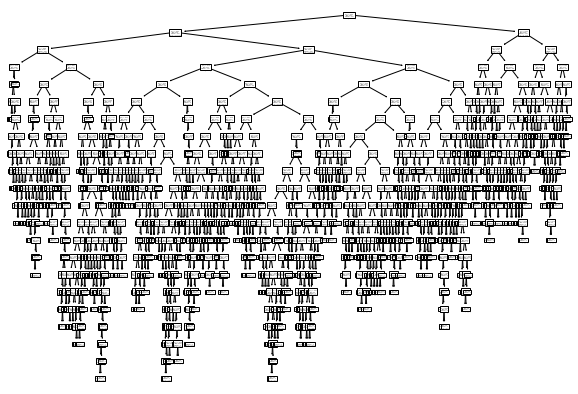

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

맨 위의 노드를 루프노드라 부르고 맨 아래 끝에 달린 노드를 리프 노드라고 한다.

너무 복잡하니 plot_tree() 함수에서 트리의 깊이를 제한해서 출력해 보자. max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다. 또 filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있다. feature_names 매개변수에는 특성의 이름을 전달할 수 있다. 다음의 코드를 따라해 보자.

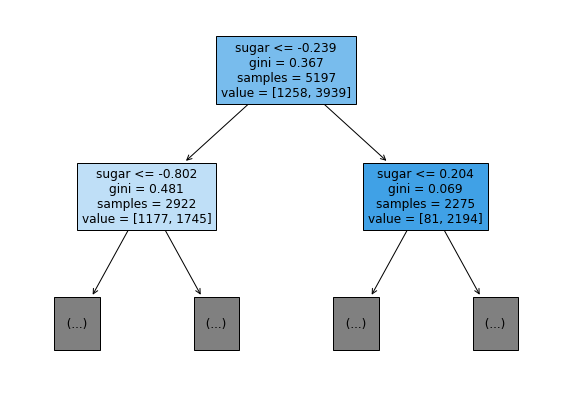

In [15]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()